<a href="https://colab.research.google.com/github/raz0208/City-Person-Dataset-EDA/blob/main/CityPersonDatasetEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CityPerson Dataset EDA (Exploratory Data Analysis)**
A complete EDA (Exploratory Data Analysis) for CityPerson dataset

## Used Dataset:


*   gtFine_trainvaltest
*   gtFinePanopticParts_trainval

## Step 1: Extract and read the datasets

In [ ]:
# Instal Required Libraries
import zipfile
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import numpy as np
import pandas as pd

In [ ]:
# Dataset zip files path from Google Drive
gtFine = '/content/drive/MyDrive/CityPersonDataset/gtFine_trainvaltest.zip'
gtFinePanopticParts = '/content/drive/MyDrive/CityPersonDataset/gtFinePanopticParts_trainval.zip'

gtFine_ExtPath = '/content/CityPersonDataset/gtFine_trainvaltest'
gtFinePano_ExtPath = '/content/CityPersonDataset/gtFinePanopticParts_trainval'

In [ ]:
# Extracting files function
def extract_zip(file_path, extract_path):
    if not os.path.exists(extract_path):
        os.makedirs(extract_path)
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Extract both datasets zip files
extract_zip(gtFine, gtFine_ExtPath)
extract_zip(gtFinePanopticParts, gtFinePano_ExtPath)

## Dataset Structure:

1.   gtFine_trainvaltest
  *   Contains PNG and JSON files.
  *   Organized by:
       * Train, validation, and test folders.
  *   Files Type:
      * *_color.png: Color-coded images for segmentation.
      * *_instanceIds.png: Encoded image masks where each pedestrian is represented with a unique ID.
      * *_labelIds.png: Encoded image masks for class labels.
      * *_polygons.json: Contains polygonal annotations for semantic segmentation, instance
2. gtFinePanopticParts_trainval:
    * Contains TIF files.
    * Organized similarly to gtFine_trainvaltest.
    * File type:
      * *_gtFinePanopticParts.tif: Panoptic segmentation with part-level annotations (e.g., parts of a pedestrian like arms or legs).

In [ ]:
# List the extracted content from both datasets
gtFine_Files = os.listdir(gtFine_ExtPath)
gtFinepano_Files = os.listdir(gtFinePano_ExtPath)

gtFine_Files, gtFinepano_Files

(['gtFine', 'license.txt', 'README'],
 ['README_panopticParts.md', 'license.txt', 'gtFinePanopticParts'])

In [ ]:
# Path to core folder
gtFine_CorePath = os.path.join(gtFine_ExtPath, 'gtFine')
gtFinePano_CorePath = os.path.join(gtFinePano_ExtPath, 'gtFinePanopticParts')

# List driectories inside core folders
gtFine_Dirs = os.listdir(gtFine_CorePath) if os.path.exists(gtFine_CorePath) else []
gtFinePano_Dirs = os.listdir(gtFinePano_CorePath) if os.path.exists(gtFinePano_CorePath) else []

gtFine_Dirs, gtFinePano_Dirs

(['train', 'test', 'val'], ['train', 'val'])

In [ ]:
##### SIMPLE IMPLEMENTATION

# # Listing the sample files from the 'train' directory if it exists in both datasets
# gtfine_trainSample = os.listdir(os.path.join(gtFine_CorePath, 'train')) if 'train' in gtFine_Dirs else []
# gtFinePano_trainSample = os.listdir(os.path.join(gtFinePano_CorePath, 'train')) if 'train' in gtFinePano_Dirs else []

# gtFine_Dirs, gtfine_trainSample[:], gtFinePano_Dirs, gtFinePano_trainSample[:]

######

# Define the subdirectories
subdirs = gtFine_Dirs #["train", "val", "test"]

# Initialize dictionaries to store samples from each subdirectory
gtFine_CityFolders = {}
gtFinePano_CityFolders = {}

# Process each subdirectory
for subdir in subdirs:
    gtFine_CityFolders[subdir] = os.listdir(os.path.join(gtFine_CorePath, subdir)) if subdir in gtFine_Dirs else []
    gtFinePano_CityFolders[subdir] = os.listdir(os.path.join(gtFinePano_CorePath, subdir)) if subdir in gtFinePano_Dirs else []

# Output the first few files for each subdirectory
gtFine_CityFolders_Preview = {key: value[:] for key, value in gtFine_CityFolders.items()}
gtFinePano_CityFolders_Preview = {key: value[:] for key, value in gtFinePano_CityFolders.items()}

gtFine_CityFolders_Preview, gtFinePano_CityFolders_Preview

({'train': ['erfurt',
   'ulm',
   'jena',
   'darmstadt',
   'hamburg',
   'weimar',
   'bochum',
   'stuttgart',
   'bremen',
   'monchengladbach',
   'cologne',
   'zurich',
   'hanover',
   'dusseldorf',
   'strasbourg',
   'krefeld',
   'aachen',
   'tubingen'],
  'test': ['mainz', 'leverkusen', 'bielefeld', 'munich', 'bonn', 'berlin'],
  'val': ['munster', 'lindau', 'frankfurt']},
 {'train': ['erfurt',
   'ulm',
   'jena',
   'darmstadt',
   'hamburg',
   'weimar',
   'bochum',
   'stuttgart',
   'bremen',
   'monchengladbach',
   'cologne',
   'zurich',
   'hanover',
   'dusseldorf',
   'strasbourg',
   'krefeld',
   'aachen',
   'tubingen'],
  'test': [],
  'val': ['munster', 'lindau', 'frankfurt']})

## Files structure

For example: the file structure in the "bochum" city directory confirms the expected dataset formats and relationships:

1. gtFine Dataset (bochum):
    - Files include:
       - Color-coded images (e.g., bochum_000000_000313_gtFine_color.png).
       - Instance masks (e.g., bochum_000000_000313_gtFine_instanceIds.png).
       - Label masks (e.g., bochum_000000_000313_gtFine_labelIds.png).
       - Polygon annotations (e.g., bochum_000000_000313_gtFine_polygons.json).

2. gtFinePanopticParts Dataset (bochum):
    - Files include:
      - Panoptic segmentation with part-level detail (e.g., bochum_000000_000313_gtFinePanopticParts.tif).

## Observed Relationship:
- The filenames match across datasets, indicating alignment.
  - For example: bochum_000000_000313_gtFinePanopticParts.tif aligns with the corresponding files in gtFine for color, instance, label, and polygons.

In [ ]:
# Select 3 cities name randomly from 'train' folder to check files
selected_cities = random.sample(gtFine_CityFolders['train'], 3)

# List files for each selected city
gtFine_city_files = {}
gtFinePano_city_files = {}
gtFine_city_files_sorted = {}
gtFinePano_city_files_sorted = {}

for city in selected_cities:
    gtFine_city_path = os.path.join(gtFine_CorePath, "train", city)
    gtFinePano_city_path = os.path.join(gtFinePano_CorePath, "train", city)

    gtFine_city_files[city] = sorted(os.listdir(gtFine_city_path) if os.path.exists(gtFine_city_path) else [])
    gtFinePano_city_files[city] = sorted(os.listdir(gtFinePano_city_path) if os.path.exists(gtFinePano_city_path) else [])

    gtFine_city_files_sorted[city] = gtFine_city_files[city][:4]
    gtFinePano_city_files_sorted[city] = gtFinePano_city_files[city][:1]

# Preview sample files for each city
gtFine_city_files_sorted, gtFinePano_city_files_sorted

({'aachen': ['aachen_000000_000019_gtFine_color.png',
   'aachen_000000_000019_gtFine_instanceIds.png',
   'aachen_000000_000019_gtFine_labelIds.png',
   'aachen_000000_000019_gtFine_polygons.json'],
  'darmstadt': ['darmstadt_000000_000019_gtFine_color.png',
   'darmstadt_000000_000019_gtFine_instanceIds.png',
   'darmstadt_000000_000019_gtFine_labelIds.png',
   'darmstadt_000000_000019_gtFine_polygons.json'],
  'hamburg': ['hamburg_000000_000042_gtFine_color.png',
   'hamburg_000000_000042_gtFine_instanceIds.png',
   'hamburg_000000_000042_gtFine_labelIds.png',
   'hamburg_000000_000042_gtFine_polygons.json']},
 {'aachen': ['aachen_000000_000019_gtFinePanopticParts.tif'],
  'darmstadt': ['darmstadt_000000_000019_gtFinePanopticParts.tif'],
  'hamburg': ['hamburg_000000_000042_gtFinePanopticParts.tif']})

### Visualize sample images and annotations

The visualization showcases the following:

1. Color Image: A standard RGB image representing the scene.
2. Instance Mask: Encoded segmentation where each pedestrian instance is uniquely labeled.
3. Panoptic Segmentation: A TIF file providing part-level segmentation for pedestrians (e.g., distinguishing arms, legs, etc.).

This confirms the alignment between datasets and their usability for pedestrian detection tasks.

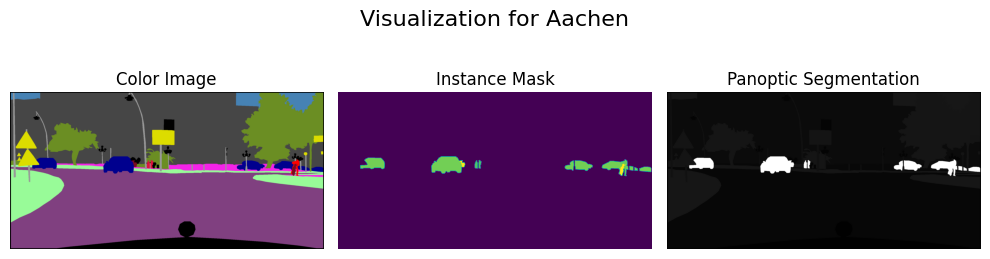

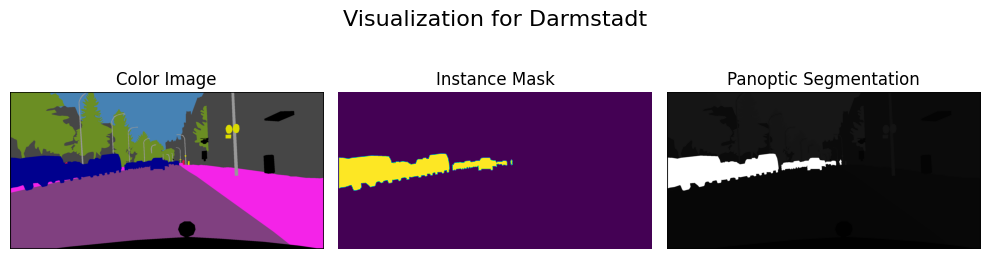

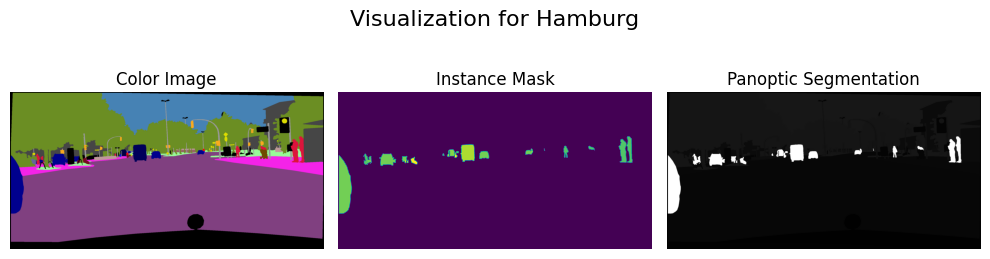

In [ ]:
# File paths for sample images from selected cities
for city in selected_cities:
  # Geting files path
  color_image_path = os.path.join('/content/CityPersonDataset/gtFine_trainvaltest/gtFine/train/', city, gtFine_city_files_sorted[city][0]) # '_gtFine_color.png'
  instance_image_path = os.path.join('/content/CityPersonDataset/gtFine_trainvaltest/gtFine/train/', city, gtFine_city_files_sorted[city][1]) # '_gtFine_instanceIds.png'
  panoptic_image_path = os.path.join('/content/CityPersonDataset/gtFinePanopticParts_trainval/gtFinePanopticParts/train/', city, gtFinePano_city_files_sorted[city][0]) # '_gtFinePanopticParts.tif'

  # Loading images
  color_image = Image.open(color_image_path)
  instance_image = Image.open(instance_image_path)
  panoptic_image = Image.open(panoptic_image_path)

  # Display the images
  fig, axs = plt.subplots(1, 3, figsize=(10, 3))
  fig.suptitle(f"Visualization for {city.capitalize()}", fontsize=16)

  axs[0].imshow(color_image)
  axs[0].set_title('Color Image')
  axs[0].axis('off')

  axs[1].imshow(instance_image, cmap='viridis')
  axs[1].set_title('Instance Mask')
  axs[1].axis('off')

  axs[2].imshow(panoptic_image, cmap='viridis')
  axs[2].set_title('Panoptic Segmentation')
  axs[2].axis('off')

  plt.tight_layout()
  plt.show()

In [72]:
# Count images in each city folder
def count_images_in_cities(base_path):
    city_counts = {}
    if os.path.exists(base_path):
        for city in os.listdir(base_path):
            city_path = os.path.join(base_path, city)
            if os.path.isdir(city_path):
                image_count = len(os.listdir(city_path))
                city_counts[city] = (image_count, int(image_count / 4))
    return city_counts

# Count images in 'train' and 'val' splits for both datasets
gtFine_train_counts = count_images_in_cities(os.path.join(gtFine_CorePath, "train"))
gtFine_val_counts = count_images_in_cities(os.path.join(gtFine_CorePath, "val"))
gtFine_test_counts = count_images_in_cities(os.path.join(gtFine_CorePath, "test"))
gtFinePano_train_counts = count_images_in_cities(os.path.join(gtFinePano_CorePath, "train"))
gtFinePano_val_counts = count_images_in_cities(os.path.join(gtFinePano_CorePath, "val"))

# Create pandas DataFrames with the additional column
print("Name of the cities and number of unique IDs per city in gtFine dataset:")
gtFine_city_trainImg_count = pd.DataFrame([(city, count[0], count[1]) for city, count in gtFine_train_counts.items()], columns=["City", "Image Count", "ImgPerUniqueID"])
gtFine_city_valImg_count = pd.DataFrame([(city, count[0], count[1]) for city, count in gtFine_val_counts.items()], columns=["City", "Image Count", "ImgPerUniqueID"])
gtFine_city_testImg_count = pd.DataFrame([(city, count[0], count[1]) for city, count in gtFine_test_counts.items()], columns=["City", "Image Count", "ImgPerUniqueID"])

# Print the gtFine DataFrame
print(gtFine_city_trainImg_count)
print(gtFine_city_valImg_count)
print(gtFine_city_testImg_count)

print("\nName of the cities and number of unique IDs per city in gtFinePanopticParts dataset:")
# Save city image counts for gtFinePanopticParts dataset in pandas DataFrame
gtFinePano_city_trainImg_count = pd.DataFrame([(city, count[0]) for city, count in gtFinePano_train_counts.items()], columns=["City", "Image Count"])
gtFinePano_city_valImg_count = pd.DataFrame([(city, count[0]) for city, count in gtFinePano_val_counts.items()], columns=["City", "Image Count"])

# Print the gtFinePanopticParts DataFrame
print(gtFinePano_city_trainImg_count)
print(gtFinePano_city_valImg_count)

Name of the cities and number of unique IDs per city in gtFine dataset:
               City  Image Count  ImgPerUniqueID
0            erfurt          436             109
1               ulm          380              95
2              jena          476             119
3         darmstadt          340              85
4           hamburg          992             248
5            weimar          568             142
6            bochum          384              96
7         stuttgart          784             196
8            bremen         1264             316
9   monchengladbach          376              94
10          cologne          616             154
11           zurich          488             122
12          hanover          784             196
13       dusseldorf          884             221
14       strasbourg         1460             365
15          krefeld          396              99
16           aachen          696             174
17         tubingen          576             1

Visualizing gtFine dataset image counts...


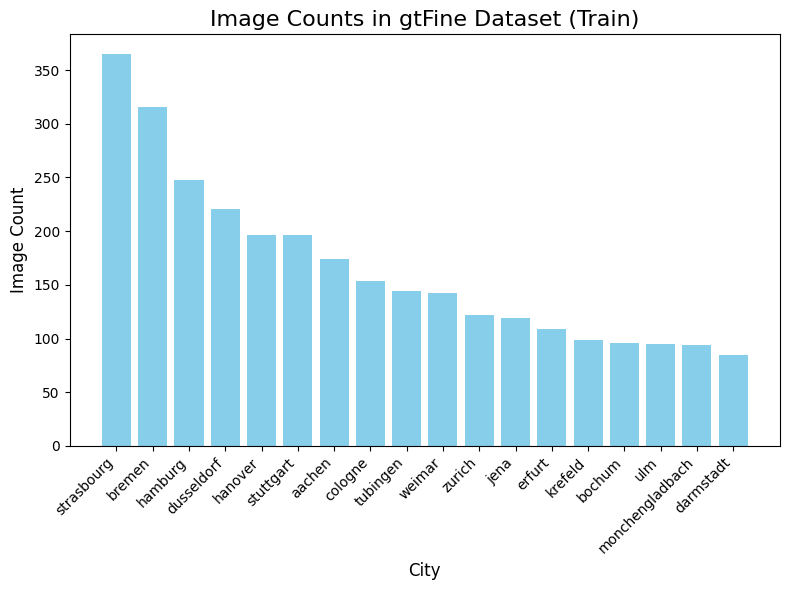

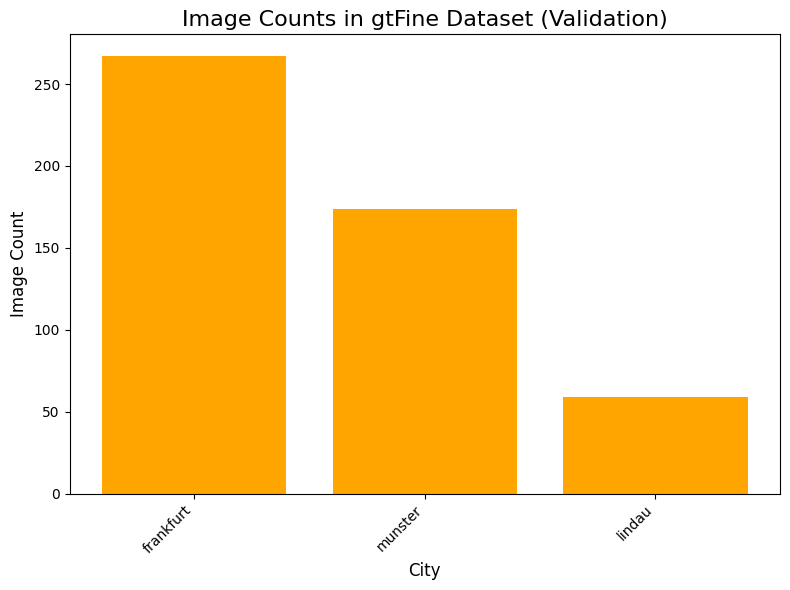

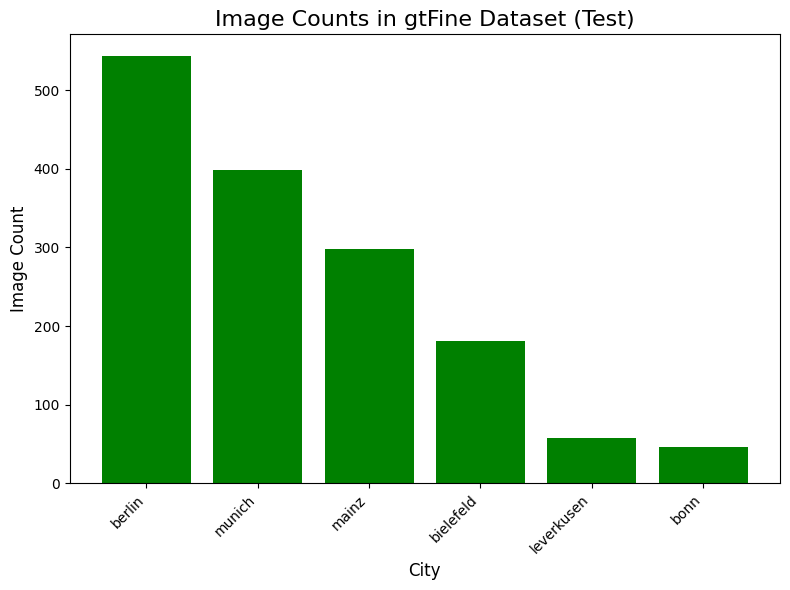

In [78]:
# Visualize cities name and the number of images per each unique ID
def gtFine_plot_city_counts(data, title, color):
    data.sort_values(by="Image Count", ascending=False, inplace=True)
    plt.figure(figsize=(8, 6))
    plt.bar(data["City"], data["ImgPerUniqueID"], color=color)
    plt.xlabel("City", fontsize=12)
    plt.ylabel("Image Count", fontsize=12)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.tight_layout()
    plt.show()

# Plotting for gtFine dataset
print("Visualizing gtFine dataset image counts...")
gtFine_plot_city_counts(gtFine_city_trainImg_count, "Image Counts in gtFine Dataset (Train)", "skyblue")
gtFine_plot_city_counts(gtFine_city_valImg_count, "Image Counts in gtFine Dataset (Validation)", "orange")
gtFine_plot_city_counts(gtFine_city_testImg_count, "Image Counts in gtFine Dataset (Test)", "green")

Visualizing gtFinePanopticParts dataset image counts...


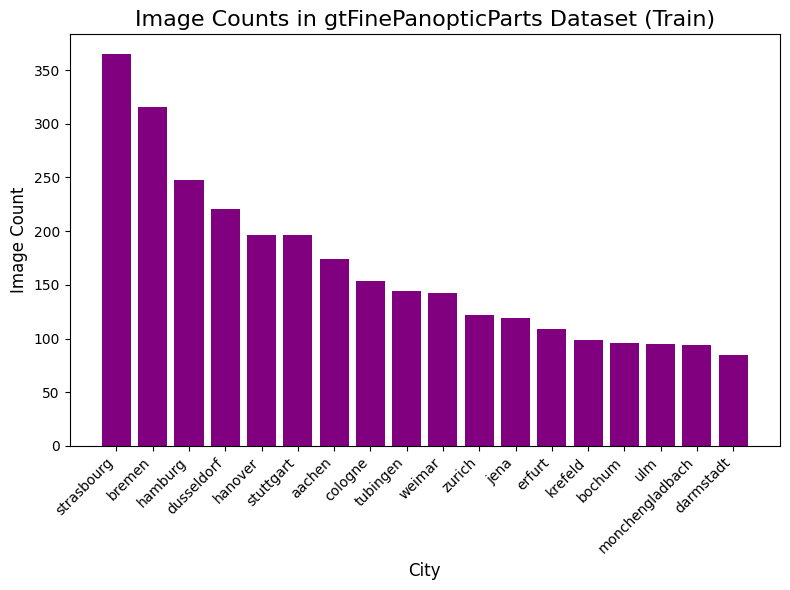

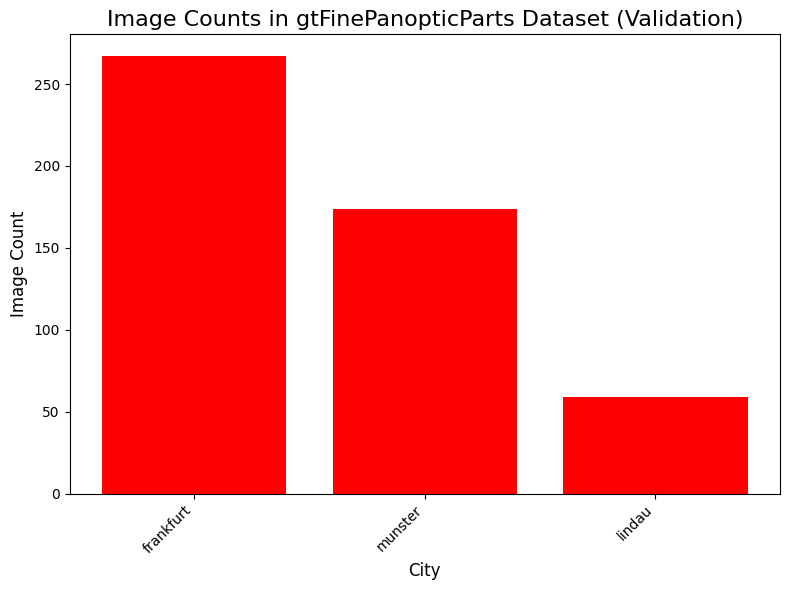

In [79]:
# Visualize cities name and the number of images per each unique ID
def gtFinePano_plot_city_counts(data, title, color):
    data.sort_values(by="Image Count", ascending=False, inplace=True)
    plt.figure(figsize=(8, 6))
    plt.bar(data["City"], data["Image Count"], color=color)
    plt.xlabel("City", fontsize=12)
    plt.ylabel("Image Count", fontsize=12)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.tight_layout()
    plt.show()

# Plotting for gtFinePanopticParts dataset
print("Visualizing gtFinePanopticParts dataset image counts...")
gtFinePano_plot_city_counts(gtFinePano_city_trainImg_count, "Image Counts in gtFinePanopticParts Dataset (Train)", "purple")
gtFinePano_plot_city_counts(gtFinePano_city_valImg_count, "Image Counts in gtFinePanopticParts Dataset (Validation)", "red")

In [ ]:
# # Load a sample instance mask and analyze unique IDs
# sample_instance_array = np.array(instance_image)
# unique_instance_ids = np.unique(sample_instance_array)
# instance_id_count = Counter(sample_instance_array.flatten())

# # Summary of dataset structure and annotations
# gtFine_train_counts_summary = len(gtFine_train_counts), sum(gtFine_train_counts.values())
# gtFine_val_counts_summary = len(gtFine_val_counts), sum(gtFine_val_counts.values())
# gtFine_test_counts_summary = len(gtFine_test_counts), sum(gtFine_test_counts.values())
# gtFinePanopticParts_train_counts_summary = len(gtFinePanopticParts_train_counts), sum(gtFinePanopticParts_train_counts.values())
# gtFinePanopticParts_val_counts_summary = len(gtFinePanopticParts_val_counts), sum(gtFinePanopticParts_val_counts.values())

# (gtFine_train_counts_summary, gtFine_val_counts_summary, gtFine_test_counts_summary,
#  gtFinePanopticParts_train_counts_summary, gtFinePanopticParts_val_counts_summary,
#  unique_instance_ids[:10], instance_id_count.most_common(5))